<a href="https://colab.research.google.com/github/codingbjs/MachineLearning/blob/main/Logistic_Regression/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

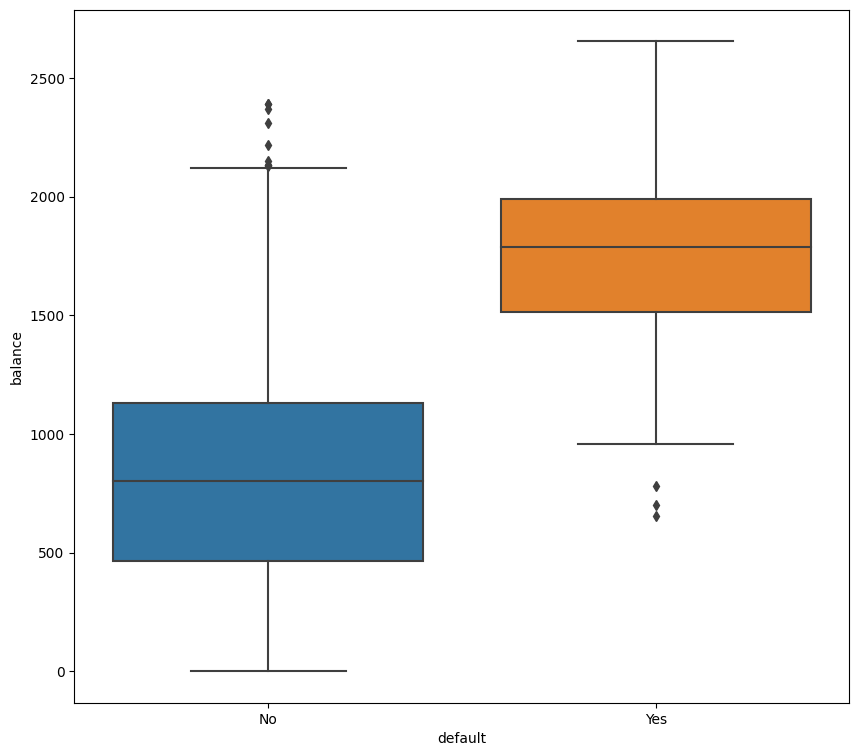

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
sns.boxplot(data= DF,
            x='default',
            y='balance',
            order=['No', 'Yes'])
plt.show()

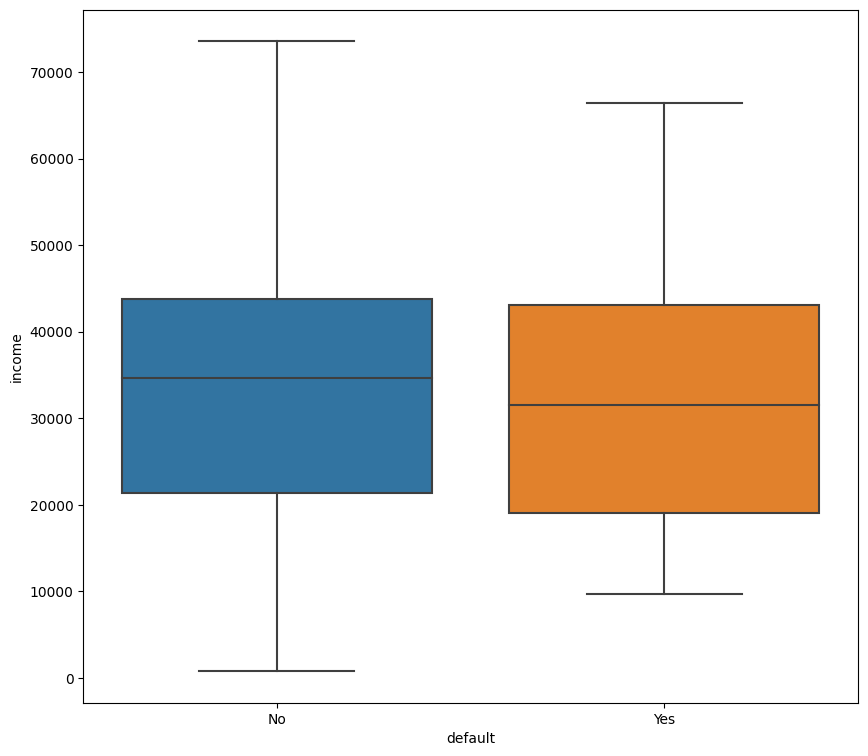

In [9]:
plt.figure(figsize=(10,9))
sns.boxplot(data= DF,
            x='default',
            y='income',
            order=['No', 'Yes'])
plt.show()

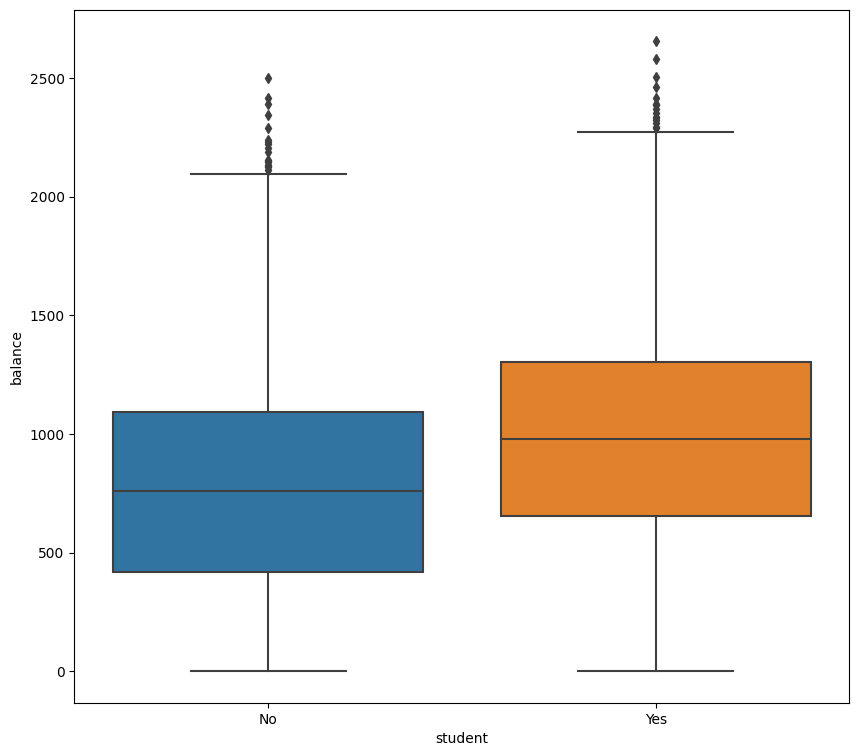

In [10]:
plt.figure(figsize=(10,9))
sns.boxplot(data= DF,
            x='student',
            y='balance',
            order=['No', 'Yes'])
plt.show()

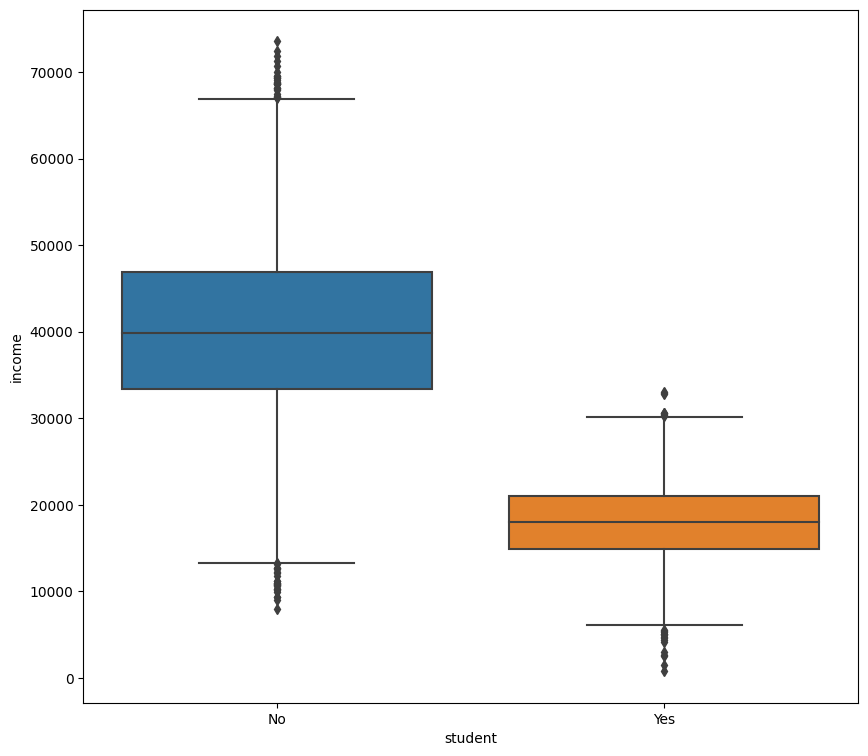

In [11]:
plt.figure(figsize=(10,9))
sns.boxplot(data= DF,
            x='student',
            y='income',
            order=['No', 'Yes'])
plt.show()

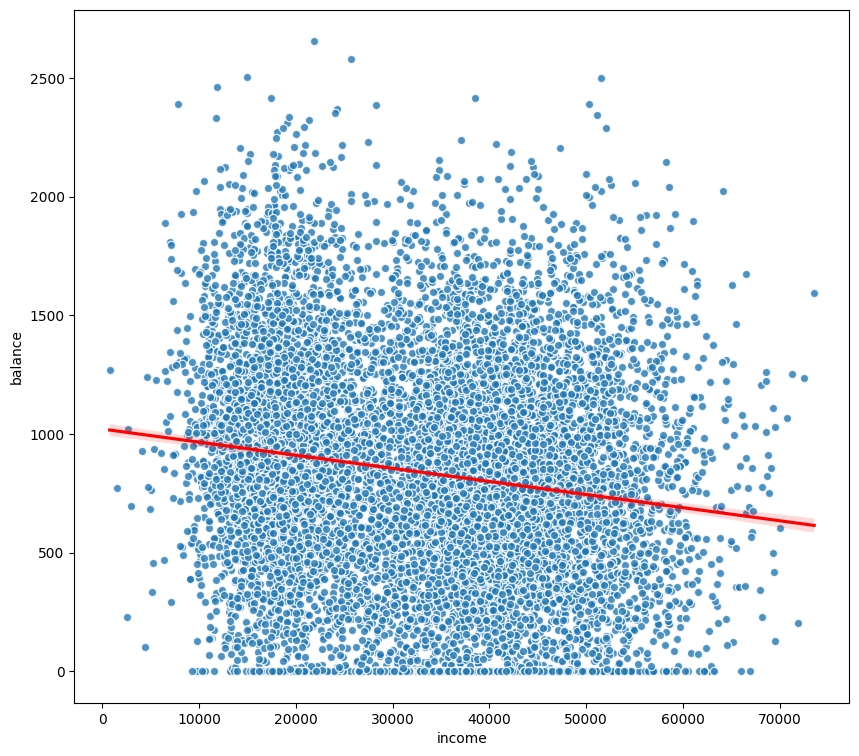

In [15]:
plt.figure(figsize=(10,9))
sns.regplot(data= DF,
            x='income',
            y='balance',
            line_kws = {'color': 'red'},
            scatter_kws={'edgecolor': 'white'})
plt.show()

In [16]:
X = DF[['balance']]
y = DF['default']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


In [18]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_hat = Model_lr.predict(X_test)
y_hat

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [22]:
import numpy as np

np.set_printoptions(precision=3, suppress=True)

Model_lr.predict_proba(X_test)

array([[0.991, 0.009],
       [0.996, 0.004],
       [0.987, 0.013],
       ...,
       [0.96 , 0.04 ],
       [1.   , 0.   ],
       [0.991, 0.009]])

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]])

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels=['Yes', 'No'])

array([[  32,   72],
       [   8, 2888]])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label='No'))
print(recall_score(y_test, y_hat, pos_label='No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label='Yes'))
print(recall_score(y_test, y_hat, pos_label='Yes'))

0.9733333333333334
0.8
0.3076923076923077


In [32]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label='No')

0.9863387978142076

In [33]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label='Yes')

0.4444444444444444

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat,
                            target_names= ['Yes', 'No'],
                            digits=5))

              precision    recall  f1-score   support

         Yes    0.97568   0.99724   0.98634      2896
          No    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000

